In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#load the data
demographics_df = pd.read_csv("demographics_data.csv").reset_index(drop = True)

In [3]:
#check data
demographics_df.head(5)

Unnamed: 0  Crude_birth_rate  Crude_death_rate  Fertility_rate   DPT_immu  \
0           0         17.995227          7.195875        2.335178  87.045374   
1           1          9.828199          9.553920        1.551680  93.800214   
2           2         18.174855          7.528826        2.414975  85.603028   
3           3         32.487000          6.423000        4.473000  66.000000   
4           4         11.780000          7.898000        1.617000  99.000000   

   HepB3_immu  Measles_immu  HIV_incidence  TB_incidence  Homicides_per100000  \
0   86.436571     87.988729        0.61822    148.000000             6.405792   
1   89.719856     93.554442        0.61822    102.948086             6.405792   
2   84.737825     85.634452        0.23000    132.000000             5.779750   
3   66.000000     64.000000        0.04000    189.000000             6.655561   
4   99.000000     94.000000        0.03000     18.000000             2.289492   

   Life_expectancy  Physicians_per1000_people  Population_density  \
0        71.854614                   1.933048           71.864149   
1        80.659892                   1.933048           35.249830   
2        72.563274                   1.933048           59.617881   
3        64.486000                   1.933048           56.937760   
4        78.458000                   1.933048          104.612263   

   Overweight_prevalence  
0               6.200000  
1               5.077778  
2               5.600000  
3               4.100000  
4               5.077778

In [4]:
#drop the empty column, rename dataframe as df

df = demographics_df.drop(['Unnamed: 0'], axis =1)


#Dataframe has been renamed to df from this point onwards.

In [5]:
#check dataframe dimension
df.shape

(218, 13)

In [6]:
#create a function to plot calulate Pearson's correlation coefficient and plot scatterplot of the data
def pearsoncorr(x,y):
    r_squared = st.pearsonr(x, y)[0]
    print(f"The r-squared is:{r_squared}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    #generating equation
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"the equation of the line is:{line_eq}")
    plt.scatter(x,y)

Next, lets run a series of correlation functions between independent and dependent variables to test for relevancy and multicollinearity

The r-squared is:-0.8629258886101114
the equation of the line is:y = -0.66x + 85.53


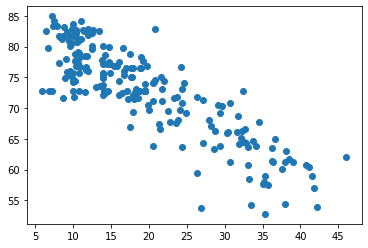

In [7]:
pearsoncorr(df.Crude_birth_rate,df.Life_expectancy)

The r-squared is:-0.1514719932586468
the equation of the line is:y = -0.43x + 76.04


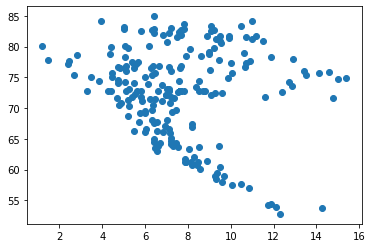

In [8]:
pearsoncorr(df.Crude_death_rate,df.Life_expectancy)

The r-squared is:-0.8452839791370969
the equation of the line is:y = -5.07x + 86.09


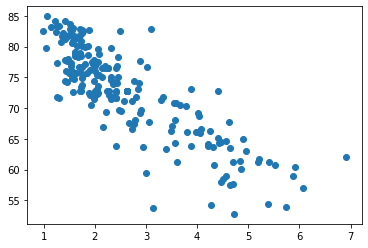

In [9]:
pearsoncorr(df.Fertility_rate,df.Life_expectancy)

The r-squared is:0.5208697421308572
the equation of the line is:y = 0.3x + 46.68


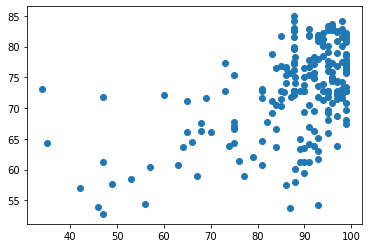

In [10]:
pearsoncorr(df.DPT_immu,df.Life_expectancy)

The r-squared is:0.43844882325054424
the equation of the line is:y = 0.25x + 51.36


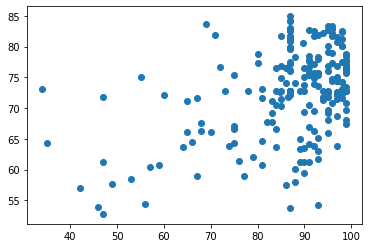

In [11]:
pearsoncorr(df.HepB3_immu,df.Life_expectancy)

The r-squared is:0.537970730953322
the equation of the line is:y = 0.29x + 47.57


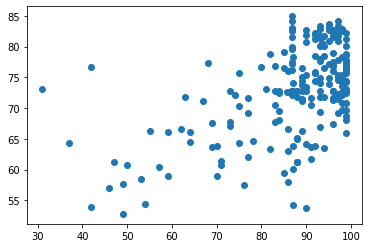

In [12]:
pearsoncorr(df.Measles_immu,df.Life_expectancy)

The r-squared is:-0.35914609111002765
the equation of the line is:y = -2.87x + 74.54


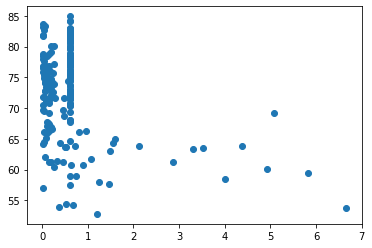

In [13]:
pearsoncorr(df.HIV_incidence,df.Life_expectancy)

A blob of straight line is due to imputing the NaN values with column means. 

The r-squared is:-0.6107829412411624
the equation of the line is:y = -0.03x + 76.15


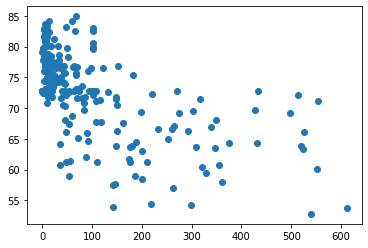

In [14]:
pearsoncorr(df.TB_incidence,df.Life_expectancy)

The r-squared is:-0.12413442442541954
the equation of the line is:y = -0.14x + 73.65


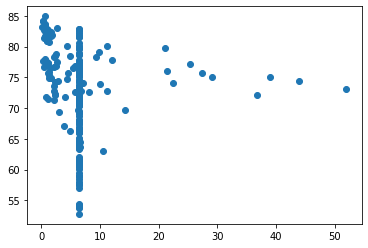

In [15]:
pearsoncorr(df.Homicides_per100000,df.Life_expectancy)

The r-squared is:0.34826537586980416
the equation of the line is:y = 2.55x + 67.83


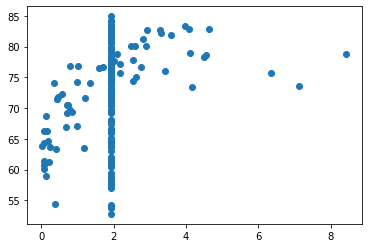

In [16]:
pearsoncorr(df.Physicians_per1000_people,df.Life_expectancy)

The r-squared is:0.19143489871660618
the equation of the line is:y = 0.0x + 72.45


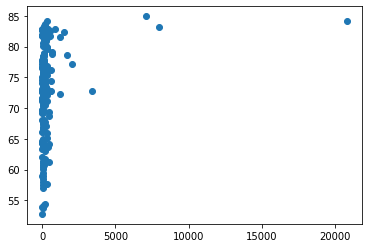

In [17]:
pearsoncorr(df.Population_density,df.Life_expectancy)

The r-squared is:0.14534580123642687
the equation of the line is:y = 0.8x + 68.7


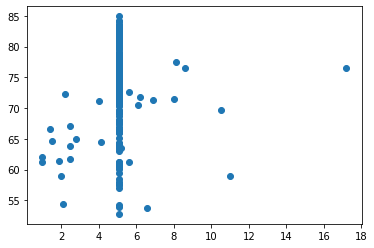

In [18]:
pearsoncorr(df.Overweight_prevalence,df.Life_expectancy)

(array([ 5.,  7., 12., 15., 16., 23., 53., 39., 23., 25.]),
 array([52.805     , 56.01791463, 59.23082927, 62.4437439 , 65.65665854,
        68.86957317, 72.0824878 , 75.29540244, 78.50831707, 81.72123171,
        84.93414634]),
 <a list of 10 Patch objects>)

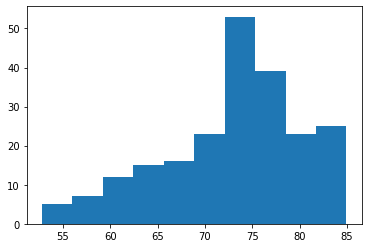

In [19]:
#plot distribution 
plt.hist(df.Life_expectancy)

In [20]:
#lets check some basic statistical details of the dataframe
df.describe()

Crude_birth_rate  Crude_death_rate  Fertility_rate    DPT_immu  \
count        218.000000        218.000000      218.000000  218.000000   
mean          19.470302          7.614794        2.625966   87.847673   
std            9.506576          2.537465        1.203142   12.670187   
min            5.900000          1.202000        0.977000   34.000000   
25%           11.014500          5.995500        1.713750   86.000000   
50%           17.869000          7.322000        2.309000   91.000000   
75%           24.756000          9.079250        3.128250   96.000000   
max           46.079000         15.400000        6.913000   99.000000   

       HepB3_immu  Measles_immu  HIV_incidence  TB_incidence  \
count  218.000000    218.000000      218.00000    218.000000   
mean    86.865023     86.923596        0.61822    102.948086   
std     12.854457     13.407418        0.90286    134.159257   
min     34.000000     31.000000        0.01000      0.000000   
25%     85.000000     85.725839        0.15000     10.250000   
50%     90.000000     90.000000        0.61822     47.500000   
75%     96.000000     96.000000        0.61822    139.500000   
max     99.000000     99.000000        6.66000    611.000000   

       Homicides_per100000  Life_expectancy  Physicians_per1000_people  \
count           218.000000       218.000000                 218.000000   
mean              6.405792        72.760908                   1.933048   
std               6.490071         7.222217                   0.985673   
min               0.156318        52.805000                   0.035800   
25%               3.280195        68.840000                   1.933048   
50%               6.405792        72.852732                   1.933048   
75%               6.405792        77.625360                   1.933048   
max              52.018926        84.934146                   8.421800   

       Population_density  Overweight_prevalence  
count          218.000000             218.000000  
mean           355.691337               5.077778  
std           1593.326689               1.312026  
min              0.136492               1.000000  
25%             38.626171               5.077778  
50%             92.872153               5.077778  
75%            237.215073               5.077778  
max          20777.500261              17.200000